In [245]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.io as sio
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
sns.set_palette("colorblind")

In [225]:
def in_out_group_correlations(solution, corrmat):
    in_group_mean = {}
    out_group_mean = {}
    ratio_means = {}
    
    for i_clust in np.unique(solution):
        # Correlations among items in the cluster
        in_group = corrmat[np.where(solution==i_clust)[0], :]
        in_group = in_group[:, np.where(solution==i_clust)[0]]
        n = in_group.shape[0]

        # Correlations between items in the cluster and those outside the cluster
        out_group =  corrmat[np.where(solution==i_clust)[0], :]
        out_group = out_group[:, np.where(solution!=i_clust)[0]]

        # In group is symmetric. Pull upper triangle minus center diagonal.
        iu1 = np.triu_indices(in_group.shape[0], 1)
        in_group = in_group[iu1]

        # Out_group is not, so no need for upper triangle. Just convert to 1d.
        out_group = out_group.ravel()

        # Info
        in_group_mean[i_clust+1] = np.mean(in_group)
        out_group_mean[i_clust+1] = np.mean(out_group)
        ratio_means[i_clust+1] = np.mean(in_group) / np.mean(out_group)
    return in_group_mean, out_group_mean, ratio_means

In [172]:
LV = sio.loadmat('/Users/Katie/Dropbox/Data/Naturalistic/NewSolution/Naturalistic_11.25.17.mat')
corrmat = LV['corrmat']
matlab_solution = np.squeeze(LV['IDX'][0, 4])
matlab_solution -= 1

In [20]:
in_dir = '/Users/Katie/Dropbox/Data/Naturalistic/NewSolution/python_output'

In [226]:
matlab_kmeans = in_out_group_correlations(matlab_solution, corrmat)

kernelk = np.genfromtxt('{0}/kernelk_labels_6.txt'.format(in_dir), delimiter='\t')
kernel_kmeans = in_out_group_correlations(kernelk, corrmat)

pythonk = np.genfromtxt('{0}/kmeans_labels_6.txt'.format(in_dir), delimiter='\t')
python_kmeans = in_out_group_correlations(pythonk, corrmat)

wards = np.genfromtxt('{0}/ward_labels_6.txt'.format(in_dir), delimiter='\t')
wards_cluster = in_out_group_correlations(wards, corrmat)

In [260]:
compare_mean_ratios = pd.DataFrame([kernel_kmeans[2], matlab_kmeans[2], python_kmeans[2], wards_cluster[2]], 
                                index=['Kernel KMeans', 'Matlab KMeans', 'Python KMeans', 'Ward\'s']).transpose()

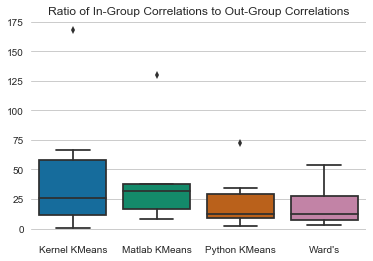

In [272]:
#Plot the ratios of in-group correlations to out-group correlations
#Ratios across clusters within the 6-cluster solution
ax = sns.boxplot(data=compare_mean_ratios)

# Finalize the figure
ax.set_title("Ratio of In-Group Correlations to Out-Group Correlations")
plt.savefig('{0}/corr_plot.png'.format(in_dir), dpi=300)
sns.despine(left=True, bottom=True)

In [258]:
k_silhouettes = np.genfromtxt('{0}/python_kmean_silhouettes.txt'.format(in_dir), delimiter='\t')
kk_silhouettes = np.genfromtxt('{0}/kernel_kmean_silhouettes.txt'.format(in_dir), delimiter='\t')
w_silhouettes = np.genfromtxt('{0}/wards_silhouettes.txt'.format(in_dir), delimiter='\t')
matlab_k_silhouettes = np.genfromtxt('{0}/matlab_kmean_silhouettes.txt'.format(in_dir), delimiter='\t')

silhouettes = {'Kernel KMeans': kk_silhouettes,
               'Matlab KMeans': matlab_k_silhouettes,
               'Python KMeans': k_silhouettes,
               'Ward\'s': w_silhouettes}
sils = pd.DataFrame(silhouettes, index=[2, 3, 4, 5, 6, 7, 8, 9, 10])

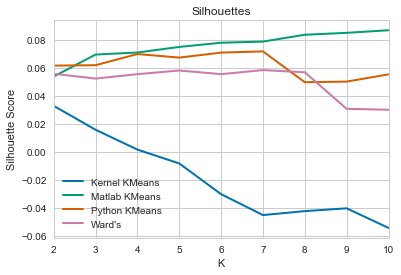

In [266]:
plt.figure()
#plots = sils.plot(kind='line', subplots=False)
ax = sils.plot(lw=2, title='Silhouettes')
ax.set_xlabel("K")
ax.set_ylabel("Silhouette Score")
plt.savefig('{0}/Sil_plot.png'.format(in_dir), dpi=300)
plt.show()

In [256]:
vi = pd.read_csv('{0}/variation_of_information.csv'.format(in_dir), sep=',', header=0, 
                 names=['Kernel KMeans', 'Matlab KMeans', 'Python KMeans', 'Ward\'s'])

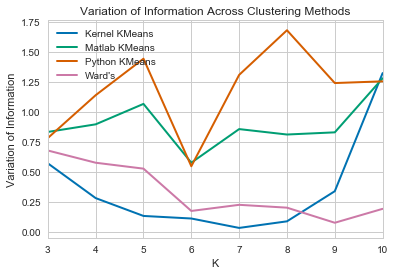

In [265]:
plt.figure()
#plots = sils.plot(kind='line', subplots=False)
ax = vi.plot(lw=2, title='Variation of Information Across Clustering Methods')
ax.set_xlabel("K")
ax.set_ylabel("Variation of Information")
plt.savefig('{0}/VI_plot.png'.format(in_dir), dpi=300)
plt.show()